First of all we will import some libraries for doing data processing and some linear algebra related work , in addition we will also import libraries for the data visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now we will read the csv file and store it in ( df ) variable

In [2]:
df = pd.read_csv('Social.csv')
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
72,15595228,Female,20,23000,0
234,15619407,Female,38,112000,0
118,15642725,Male,40,59000,0
215,15779529,Female,60,108000,1
60,15814004,Male,27,20000,0


In [3]:
df=df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
151,41,45000,0
312,38,50000,0
343,47,51000,1
64,59,83000,0
142,35,59000,0


Before applying standardization technique on our dataset it is recommeded to first split our dataset into test and train

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)


Now for doing the standardization on our dataset first of all we will import the standard scaler class from the sklearn library and will initialize the object of standard scaler class

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Now by using the fit method we will compute mean and standard deviation and will store it in the internal object we created
X_train_scaled = scaler.fit(X_train)

# After using fit method , now we will use transform method to transform the feature values 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# The transform method we use for transforming the feature values convert the datafram to numpy array 
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [8]:
# For simplicity purpose we will again convert the numpy array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

So far we have applied standardization , on our dataset features , Now since we know that after applying standardization on feature , the mean and standard deviation of the feature becomes 0 and 1 respectively so now we will see the difference between the mean and standard deviaion of feature before and after standardization

In [13]:
# For the simplicity purpose we are rounding the values
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [14]:
# After standardization
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


After applying standardization the mean and standard deviation on the applied feature is 0 and 1 , now let's visualize the before and after effects of standardization

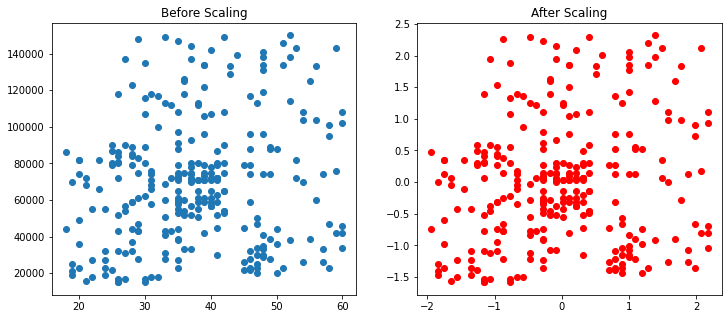

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

## Effect of standardization ( Feature Scaling ) on Logistic Regression Alogrithm accuracy

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [23]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [24]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667
